In [1]:
# MNIST Classification Model using only Numpy and Python

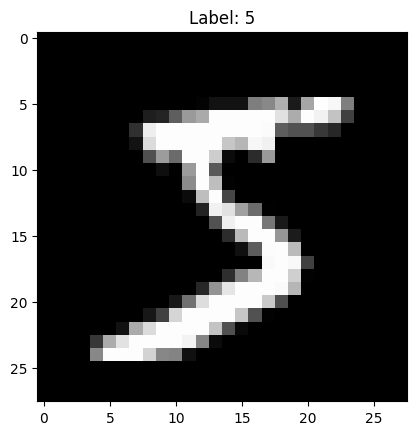

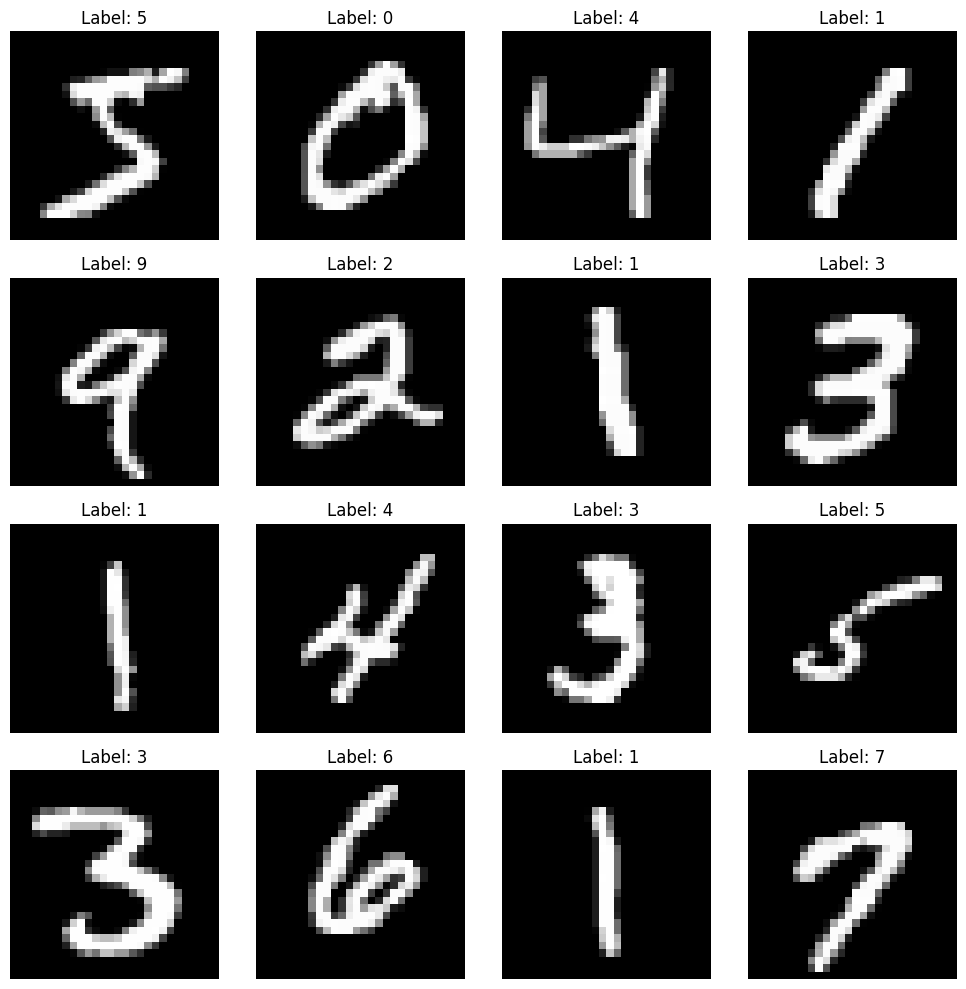

In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt

def load_mnist_images(file_path):
    """Load MNIST image file in ubyte format."""
    with open(file_path, 'rb') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        if magic_number != 2051:
            raise ValueError(f"Invalid magic number {magic_number}, expected 2051")
        num_images = int.from_bytes(f.read(4), 'big')
        num_rows = int.from_bytes(f.read(4), 'big')
        num_cols = int.from_bytes(f.read(4), 'big')
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, num_rows * num_cols)
    return images / 255.0  # Normalize to [0, 1]

def load_mnist_labels(file_path):
    """Load MNIST label file in ubyte format."""
    with open(file_path, 'rb') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        if magic_number != 2049:
            raise ValueError(f"Invalid magic number {magic_number}, expected 2049")
        num_labels = int.from_bytes(f.read(4), 'big')
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

# File paths
train_images_path = "/Users/lakshitjain/Developer/College/DL Lab/experiment_1_data/train-images-idx3-ubyte/train-images-idx3-ubyte"
train_labels_path = "/Users/lakshitjain/Developer/College/DL Lab/experiment_1_data/train-labels-idx1-ubyte/train-labels-idx1-ubyte"
test_images_path = "/Users/lakshitjain/Developer/College/DL Lab/experiment_1_data/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte"
test_labels_path = "/Users/lakshitjain/Developer/College/DL Lab/experiment_1_data/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte"

# Load the dataset
x_train = load_mnist_images(train_images_path)
y_train = one_hot_encode(load_mnist_labels(train_labels_path))
x_test = load_mnist_images(test_images_path)
y_test = one_hot_encode(load_mnist_labels(test_labels_path))

# Visualize the dataset
img = x_train[0].reshape(28, 28)
plt.imshow(img, cmap='gray')
plt.title(f"Label: {np.argmax(y_train[0])}")
plt.show()

fig, axes = plt.subplots(4, 4, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    img = x_train[i].reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {np.argmax(y_train[i])}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [5]:
# Defining one hot encoding
def one_hot_encode(labels, num_classes=10):
    return np.eye(num_classes)[labels]

# Initializing weights from 0.01 and bias from 0
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(0)
    W1 = np.random.randn(input_size, hidden_size) * 0.01
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.01
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

# Relu Activation
def relu(z):
    return np.maximum(0, z)

# ReLU Derivative
def relu_derivative(z):
    return (z > 0).astype(float)

# Softmax Activation
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stability improvement
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [6]:
# Simple Forward Propagation
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# Backward Propagation
def backward_propagation(X, Y, Z1, A1, Z2, A2, W1, W2):
    m = X.shape[0]
    dZ2 = A2 - Y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2

# Update the parameters
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

In [9]:
# Function to check the accuracy
def evaluate(predictions, labels):
    pred_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(labels, axis=1)
    accuracy = np.mean(pred_classes == true_classes)
    return accuracy

# Main Function
def train(X_train, Y_train, X_test, Y_test, hidden_size=128, epochs=20, learning_rate=0.1):
    input_size = X_train.shape[1]
    output_size = Y_train.shape[1]
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)

    for epoch in range(epochs):
        Z1, A1, Z2, A2 = forward_propagation(X_train, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = backward_propagation(X_train, Y_train, Z1, A1, Z2, A2, W1, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        if (epoch+1) % 50 == 0 or epoch==0:
            train_accuracy = evaluate(A2, Y_train)
            test_accuracy = evaluate(forward_propagation(X_test, W1, b1, W2, b2)[-1], Y_test)
            print(f"Epoch {epoch + 1}/{epochs}: Train Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}")

    return W1, b1, W2, b2


In [10]:
# Train the model
trained_parameters = train(x_train, y_train, x_test, y_test, hidden_size=256, epochs=250, learning_rate=0.3)

Epoch 1/250: Train Accuracy = 0.1248, Test Accuracy = 0.3524
Epoch 50/250: Train Accuracy = 0.8534, Test Accuracy = 0.8615
Epoch 100/250: Train Accuracy = 0.8930, Test Accuracy = 0.8981
Epoch 150/250: Train Accuracy = 0.9043, Test Accuracy = 0.9095
Epoch 200/250: Train Accuracy = 0.9122, Test Accuracy = 0.9165
Epoch 250/250: Train Accuracy = 0.9179, Test Accuracy = 0.9221
